<a href="https://colab.research.google.com/github/hzhoujoy/HW4_ST554/blob/main/HW4_JoyZhou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Home Work 4
Author: Huiping Zhou
Date: 2/5/2026
```

# Summarizing Student Data Graphically

## Bring in Homework 3 Code
- Copy your code and markdown cells from homework 3 that read in the data and summarized it
numerically.
- We were essentially starting an EDA there.
- Our goal is to now add to this basic EDA by including graphs that describe the variables.

# Summarizing Data Numerically
The [`StudentData.txt`](https://www4.stat.ncsu.edu/online/datasets/StudentData.txt) dataset will be used in this section. This dataset is from the [the UCI machine learning repository](https://archive.ics.uci.edu/dataset/320/student+performance). The information of interested variabls dee below:
- school: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex: student's sex (binary: 'F' - female or 'M' - male)
- age: student's age(numeric: from 15 to 22)
- Pstatus: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- internet: Internet access at home (binary: yes or no)
- absences: number of school absences (numeric: from 0 to 93)
- G1: first period grade (numeric: from 0 to 20)
- G2: second period grade (numeric: from 0 to 20)
- G3: final grade (numeric: from 0 to 20, output target)





## Task 1: read in the data


In [54]:
import pandas as pd
math_score = pd.read_csv(
    "https://www4.stat.ncsu.edu/online/datasets/StudentData.txt",
    sep=";"
)
math_score.head() #check the first few observations

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [55]:
# create category version of the variables with renamed categories
math_score["Pstatus"] = math_score["Pstatus"].astype("category")
math_score["Pstatus"] = math_score["Pstatus"].cat.rename_categories({
    "T": "Living Together",
    "A": "Apart"})
print(math_score.Pstatus.cat.categories)


Index(['Apart', 'Living Together'], dtype='object')


## Task 1


### Categorical variables

Create a one-way contingency table, a two-way contingency table, and a three-way contingency table
- Interpret a number from each resulting table (that is, pick out a value produced and explain what that value means.)

#### one-way contingency table

In [56]:
table_1_way = math_score.Pstatus.value_counts()
table_1_way

,count
Pstatus,
Living Together,354
Apart,41


Of the 395 students, the parents of 354 students live together, whereas the parents of 41 students live apart.

Text(0.5, 1.0, 'Students Parent Status')

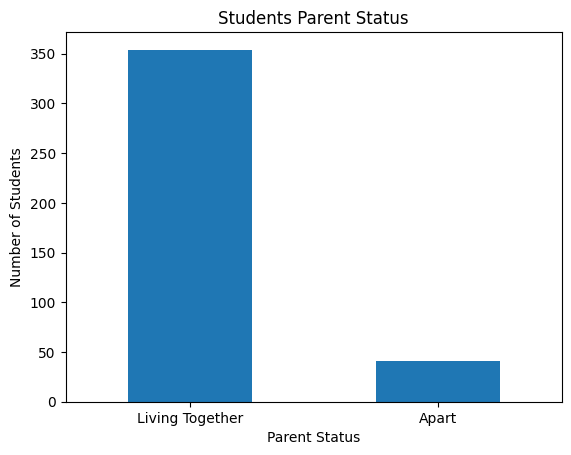

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

table_1_way.plot(kind = "bar", rot = 0)
plt.xlabel("Parent Status")
plt.ylabel("Number of Students")
plt.title("Students Parent Status")

#### two-way contigency table

In [58]:
table_2_way = pd.crosstab(
    math_score["Pstatus"],
    math_score["higher"])
table_2_way

higher,no,yes
Pstatus,,
Apart,1,40
Living Together,19,335


The two-way table sumarizes student count by parental living status(Pstatus) and plans for higher education (higher). Among the 41 students whose parents live apart, 40 plan to pursue higher education. Among the 354 students whose parents live together, 335 plan to pursue higher education, while 19 do not.

In [69]:

print(table_2_way.head())
print("Columns:", list(table_2_way.columns))
print("Index:", list(table_2_way.index))


higher           no  yes
Pstatus                 
Apart             1   40
Living Together  19  335
Columns: ['no', 'yes']
Index: ['Apart', 'Living Together']


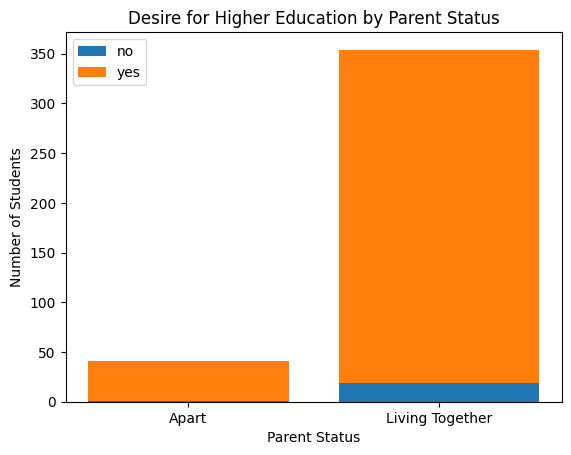

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



plt.bar(
    x=math_score.Pstatus.cat.categories,
    height= table_2_way.loc[:,"no"],
    label="no"
)
plt.bar(
    x=math_score.Pstatus.cat.categories,
    height=table_2_way.loc[:, "yes"],
    bottom=table_2_way. loc[:, "no"],  # ✅ stack on top of first bar
    label="yes"
)
plt.xlabel("Parent Status")
plt.ylabel("Number of Students")
plt.title("Desire for Higher Education by Parent Status")
plt.legend()

In [ ]:
# create category version of the variables with renamed categories
math_score["Pstatus"] = math_score["Pstatus"].astype("category")
math_score["Pstatus"] = math_score["Pstatus"].cat.rename_categories({
    "T": "Living Together",
    "A": "Apart"})
print(math_score.Pstatus.cat.categories)


Index(['Apart', 'Living Together'], dtype='object')


Text(0.5, 1.0, 'Desire for Higher Education by Parent Status')

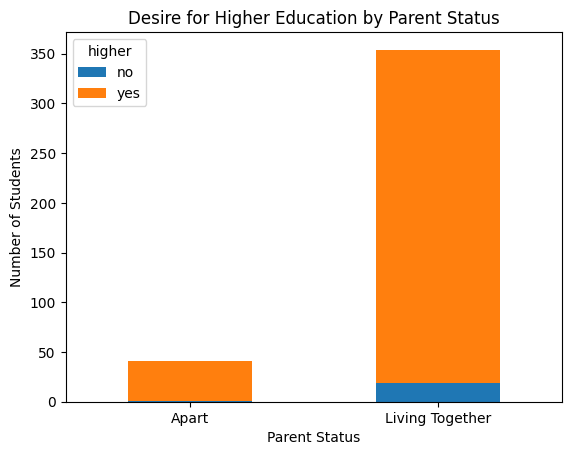

In [64]:
table_2_way.plot.bar(stacked = True, rot = 0)
plt.xlabel("Parent Status")
plt.ylabel("Number of Students")
plt.title("Desire for Higher Education by Parent Status")

Text(0.5, 1.0, 'Desire for Higher Education by Parent Status')

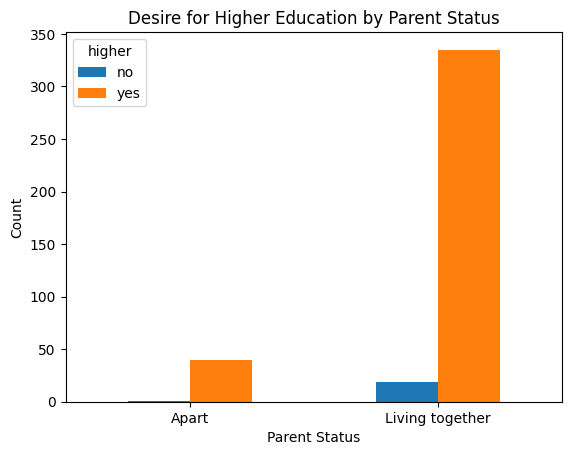

In [30]:
# side-by side bar plot
table_2_way.plot.bar(rot = 0)
plt.xlabel("Parent Status")
plt.ylabel("Number of Students")
plt.title("Desire for Higher Education by Parent Status")

#### three-way contingency table

In [31]:
table_3_way = pd.crosstab(
    [math_score.Pstatus, math_score.higher], #pass a list of columns for the rows
    math_score.internet
    )
table_3_way

internet                no  yes
Pstatus         higher         
Apart           no       0    1
                yes     10   30
Living together no       4   15
                yes     52  283

This three-way table summarizes student counts by parental living status (Pstatus), internet access at home, and plans for higher education. Among students whose parents live apart (n=41), 40 plan to pursue higher education, and 10 report no internet access. Among students whose parents live together (n=354), 335 plan to pursue higher education, and 56 report no internet access. Overall, most students plan to pursue higher education (375 of 395), and lack of internet access is more prevalent in the "parents apart" group (10/41) than in the “parents together” group (56/354).

Text(0.5, 1.0, 'Desire for Higher Education by Parent Status')

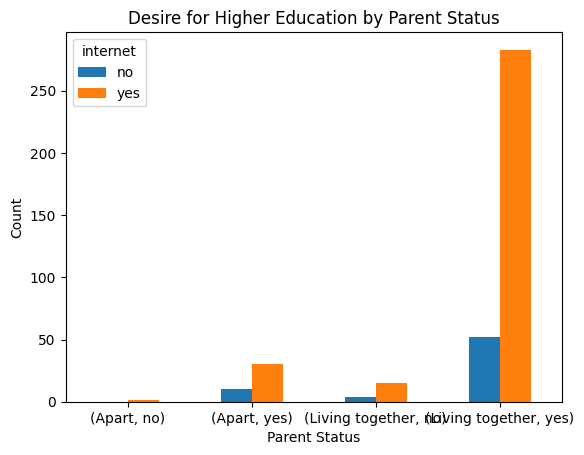

In [32]:
table_3_way.plot.bar(rot = 0)
plt.xlabel("Parent Status")
plt.ylabel("Count")
plt.title("Desire for Higher Education by Parent Status")

#### conditional two-way table


-  by subsetting the data (say with .loc) and then creating the two-way table

In [ ]:
sub_math_score = math_score.loc[math_score['school'] == 'GP']
len(sub_math_score)  #check number of observation for GP school

349

In [ ]:
pd.crosstab(
    sub_math_score.sex,
    sub_math_score.higher,
    margins=True
    )

higher,no,yes,All
sex,,,
F,4,179,183
M,13,153,166
All,17,332,349


This two-way table summarizes 349 students from Gabriel Pereira (`GP`) school. Among these students,  183 female and 166 are male.
Out os the 183 femal students, 179 plan to pursue higher education, while 153 out of 166 male students plant to pursue hingher education.

- Creating a three-way table and subsetting it

In [ ]:
my_table = pd.crosstab(
    [math_score.sex, math_score.higher], #pass a list of columns for the rows
    math_score.school,
    margins = True)
my_table

school       GP  MS  All
sex higher              
F   no        4   0    4
    yes     179  25  204
M   no       13   3   16
    yes     153  18  171
All         349  46  395

In [ ]:
# subset the table
my_table['GP'] #access the scool data using a column label

sex  higher
F    no          4
     yes       179
M    no         13
     yes       153
All            349
Name: GP, dtype: int64

The subset of the three‑way table for sex, wants to take higher education (higher0, and school shows that among 349 students from Gabriel Pereira (GP) school, 183 are female and 166 are male. Of these students, 179 out of 183 females and 153 out of 166 males plan to pursue higher education. This result is the same as that obtained by first subsetting the data by school == 'GP' and then constructing a two‑way table of sex by higher.

#### Graphical EDA about Categorical Variables

### Numeric variables (and across groups)
The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

- Find measures of center (mean and median) and spread (standard deviation and variance) for three of these variables (including G3 as one of them)

In [ ]:
#measures of center and spresd
math_score[['age', 'absences', 'G3']].agg(['mean','median','std','var'])

,age,absences,G3
mean,16.696203,5.708861,10.415190
median,17.000000,4.000000,11.000000
std,1.276043,8.003096,4.581443
var,1.628285,64.049541,20.989616


- Repeat the process while subsetting the data by the variable `sex` using `.loc[]` method

In [ ]:
math_score_sex = math_score.loc[math_score['sex'] == 'F'] #subset by sex
math_score_sex[['age', 'absences',  'G3']].agg(['mean','median','std','var'])

,age,absences,G3
mean,16.730769,6.216346,9.966346
median,17.000000,4.000000,10.000000
std,1.201696,9.445819,4.622338
var,1.444073,89.223500,21.366012


- Find measures of center and spread across a single grouping variable for three of these variables
(including G3 as one of them)
    - we can use the `pivot_table()` fruction and the `.agg()` method to find measure of center and spread across groups.
    

In [ ]:
pd.pivot_table(
    math_score,
    values = ["age", "G2", "G3"],  # the columns we want to summarize
    index = "school",              # grouping variable
    aggfunc = ["mean", "median", "std", "var"] #the aggregation functions
)

mean                       median                   std  \
               G2         G3        age     G2    G3   age        G2   
school                                                                 
GP      10.782235  10.489971  16.521490   11.0  11.0  16.0  3.808434   
MS      10.195652   9.847826  18.021739   10.0  10.0  18.0  3.377175   

                                  var                       
              G3       age         G2         G3       age  
school                                                      
GP      4.625397  1.216610  14.504166  21.394296  1.480140  
MS      4.237229  0.881643  11.405314  17.954106  0.777295

- Find measures of center and spread across two grouping variables for three of these variables (including G3 as one of them)


In [ ]:
pd.pivot_table(
    math_score,
    values = ["age", "G2", "G3"],
    index = ["school","sex"],
    aggfunc = ["mean", "median", "std", "var"]
)

mean                       median                   std  \
                   G2         G3        age     G2    G3   age        G2   
school sex                                                                 
GP     F    10.398907   9.972678  16.579235   10.0  11.0  16.0  3.646374   
       M    11.204819  11.060241  16.457831   11.0  11.0  16.0  3.947409   
MS     F    10.320000   9.920000  17.840000   10.0  10.0  18.0  3.682391   
       M    10.047619   9.761905  18.238095   10.0  10.0  18.0  3.057388   

                                      var                       
                  G3       age         G2         G3       age  
school sex                                                      
GP     F    4.604622  1.173426  13.296043  21.202546  1.376929  
       M    4.594725  1.263005  15.582037  21.111501  1.595181  
MS     F    4.846992  0.746101  13.560000  23.493333  0.556667  
       M    3.491486  0.995227   9.347619  12.190476  0.990476

- Create a correlation matrix between all of the numeric variables

In [ ]:
math_score[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000
